Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **19Feb2019**

# 03b. Nuclear Reactor Point Dynamics: Time-Dependent Reactivity
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Problem Statement](#ps)
* [Input Data](#data)
* [Steady state](#ss)
* [Vector ODE System](#vodes)
* [Function library](#flib)
* [One-Group Energy Neutron Balance](#nbal)
* [Reactivity Oscillations about Zero (Zero-Power)](#rhoosc)
  - Single cycle
  - [Power divergence at multiple cycles](#rhoosc1)
* [Ramp-Input Response for Reactor Startup](#ramp)
 + Critical Reactor
 + [Accident for Sub-Critical Shut-Down Reactor](#ramp1)
* [Interactive Results](#ires)
---

## Objectives<a id="obj"></a>
+ Use one-group energy, point-reactor dynamics modeling (six-group delayed neutron emitters) to obtain insight on neutron density behavior with time-dependent reactivity.
+ Reactivity oscillation
+ Ramp-input for reactor startup.

## Introduction<a id="intro"></a>

In-class course notes OneNote [ChEn-4350-feedback](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Eo9JUns42F1Pqmq4tFS9sJsBv2jF8UDQvRb5l5Z2D5ssag?e=FDeSpV).

Refer to Notebook 03a.


## Problem Statement<a id="ps"></a>

Given the neutron generation time $\ell$, delayed neutron fraction, $\beta$, decay constants of a six-group delayed neutron emitters, $\lambda_i$, and corresponding yield of delayed neutron fractions for each emitter, $\beta_i$, calculate the pointwise neutron density variation with time for **varying** neutron reactivity, $\rho(t)$.


## Input Data<a id="data"></a>

Name                        | Parameter          | Value                | Unit             |
----------------------------|--------------------|----------------------|------------------| 
neutron generation time     | $\ell$             | $1\times 10^{-4}$    |  s               | 
delayed neutron fraction    | $\beta$            | $6.5\times 10^{-3}$  |   -              | 


For thermal fission of $^{235}$U the following delay neutron data is typically used (*Dynamics of Nuclear Reactors*, David Hetrick, 1993, ANS textbook).


Delayed neutron emitter group No. | Decay cte ($\lambda_i$,1/sec) | Relative yield ($\beta_i/\beta$) |
----------------------------------|-------------------------------|----------------------------------| 
1                                 | 0.0124                        | 0.033                            |
2                                 | 0.0305                        | 0.219                            | 
3                                 | 0.111                         | 0.196                            |  
4                                 | 0.301                         | 0.395                            | 
5                                 | 1.14                          | 0.115                            |
6                                 | 3.01                          | 0.042                            |

In [1]:
'''Parameters'''

params = dict()

params['gen_time']          = 1.0e-4  # s
params['beta']              = 6.5e-3  # 
params['species_decay']     = [0.0124, 0.0305, 0.111, 0.301, 1.14, 3.01] # 1/sec
params['species_rel_yield'] = [0.033, 0.219, 0.196, 0.395, 0.115, 0.042] 

## One Energy Group Neutron Balance<a id="nbal"></a>

The space-invariant neutron balance for the point-reactor model without a startup source (or extraneous source), $q = 0$, is

\begin{equation*}
\frac{\text{d}n}{\text{d}t}  = \frac{\rho(t)-\beta}{\ell}\, n + \sum\limits_{i=1}^{6} \lambda_i\,c_i  + q(t),
\end{equation*}

where the first term on the right side of the equation represents the net production of neutrons not account for delayed neutrons, and the second term accounts for the source of delayed neutrons considering 6 groups of delayed neutron emitters resulting from the fission of $^{235}$U nuclei. Therefore a balance of neutron emitter species is also necessary

\begin{equation*}
\frac{\text{d}c_i}{\text{d}t}  = \frac{\beta_i}{\ell}\, n - \lambda_i\,c_i ,
     \ \ \ \ \ \forall \ \ \ \ \  i=1,\ldots,6.
\end{equation*}

where the first term on the right side of the equation is the source of emitters as a function of the neutron number density $n(t)$, and the second term is the consumption rate of the emitter by radioactive decay obtained as a function of the product of the number concentration of the emmiter, $c_i(t)$, multiplied by its decay constant $\lambda_i$. Here the number concentration of of the $i$th emitter, $c_i$ is considered in terms of delayed neutron number density, hence the units are the same as $n$.

The reactivity function variation with time explored here is either an oscillation around zero or a ramp-input:

\begin{align*}
 \rho(t) &= \rho_\text{bias} + \rho_0 \, \sin(2\pi\,w\,t), \\
 \rho(t) &= \rho_0 + \gamma\,t
\end{align*}

respectively.

## Steady State<a id="ss"></a>

Neutron density and delayed neutron precursor concentrations are related as follows:

\begin{align*}
n_\text{ss}  &= -\frac{q_\text{ss}\,\ell }{\rho_\text{ss} }
\\
c_{i_\text{ss}}  &= \frac{\beta_i}{\lambda_i\,\ell}\, n_\text{ss}   \ \ \ \ \forall \ \ \ \ i=1,\ldots,6 .
\end{align*}

In [2]:
'''Setup function for delayed neutron species concentrations at steady state'''

def setup_initial_conditions(params):
    
    # setup the steady state for the delayed-neutron precursors
    
    n_species = len(params['species_decay'])
    
    assert len(params['species_rel_yield']) == n_species
    
    import numpy as np
    c_vec_0 = np.zeros(n_species,dtype=np.float64) # initialize conentration vector

    species_decay = params['species_decay'] # retrieve list of decay constants
    lambda_vec    = np.array(species_decay) # create a numpy vector

    species_rel_yield = params['species_rel_yield']
    beta_vec = np.array(species_rel_yield) * beta  # create the beta_i's vector

    gen_time = params['gen_time'] # retrieve neutron generation time

    n_ss = params['n_ss']
    c_vec_ss = beta_vec/lambda_vec/gen_time * n_ss # compute the steady state precursors number density
    
    params['c_vec_ss'] = c_vec_ss
    
    # setup initial condition for variables
    params['n_0']     = n_ss
    params['c_vec_0'] = c_vec_ss
    params['rho_0']   = params['reactivity']
    
    return

## Vector ODE System<a id="vodes"></a>

Refer to course notes OneNote [ChEn-3170-odes](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EmY427F-dSBKkpfFOx4ikf8BVAlJXL5iep1g7V7hcTQxJQ?e=98c69b).

A vector notation for the foregoing system of equations greatly improves the generality of the derived computer code. Towards this goal let us define

\begin{equation*}
\frac{d\uvar}{dt} = \fvar( \uvar, t )
\end{equation*}

where $\uvar(t) = (u_1,u_2,u_3,u_4,u_5,u_6,u_7)$ is the state vector and we assign 

\begin{align*}
 u_1(t)&=n(t),\\
 u_2(t)&=c_1(t),\\
 u_3(t)&=c_2(t),\\
 u_4(t)&=c_3(t),\\
 u_5(t)&=c_4(t),\\
 u_6(t)&=c_5(t),\\
 u_7(t)&=c_6(t).
\end{align*}

Also for $\fvar(\uvar,t) = \bigl(f_1(\uvar,t), f_2(\uvar,t), f_3(\uvar,t), f_4(\uvar,t), f_5(\uvar,t), f_6(\uvar,t), f_7(\uvar,t)\bigr)$ we assign 

\begin{align*}
 f_1 & = \frac{\rho(t)-\beta}{\ell}\, u_1 + \sum\limits_{i=2}^{7} \lambda_i\,u_i + q(t), \\
 f_2 & = \frac{\beta_1}{\ell}\, u_1 - \lambda_1\,u_2, \\
 f_3 & = \frac{\beta_2}{\ell}\, u_1 - \lambda_2\,u_3, \\
 f_4 & = \frac{\beta_3}{\ell}\, u_1 - \lambda_3\,u_4, \\
 f_5 & = \frac{\beta_4}{\ell}\, u_1 - \lambda_4\,u_5, \\
 f_6 & = \frac{\beta_5}{\ell}\, u_1 - \lambda_5\,u_6, \\
 f_7 & = \frac{\beta_6}{\ell}\, u_1 - \lambda_6\,u_7 .
\end{align*}

Finally, the initial conditions given are as follows:

\begin{align*}
 u_1(0)&=n_0,\\
 u_2(0)&=c_{1_0},\\
 u_3(0)&=c_{2_0},\\
 u_4(0)&=c_{3_0},\\
 u_5(0)&=c_{4_0},\\
 u_6(0)&=c_{5_0},\\
 u_7(0)&=c_{6_0}
\end{align*}


where $n_0$ and $c_{i_0}$ are initial values for the unknowns given by the problem specification.

## Function Library <a id="flib"></a>

Functions used later in the notebook.

In [4]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source delta function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `'q_0'` key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    
    q = 0.0
    q_0 = params['q_0']
    
    if t <= 1e-5: # small time value
        q = q_0
    else:
        q = 0.0
        
    return q

In [5]:
'''ODE function'''

def f_vec( time, u_vec, params ):  
    
    import numpy as np
    assert np.all(u_vec >= 0.0)
    
    n_dens = u_vec[0]
    
    gen_time = params['gen_time'] 
    beta     = params['beta']
    
    species_decay = params['species_decay']
    lambda_vec    = np.array(species_decay)
    
    species_rel_yield = params['species_rel_yield']
    beta_vec = np.array(species_rel_yield) * beta
    
    assert len(lambda_vec)==len(beta_vec)
    
    rho_t = rho_func(time, params)
    
    q_source_t = q_source(time, params)
         
    c_vec = u_vec[1:]
    
    n_species = len(lambda_vec)
    f_tmp = np.zeros(n_species+1,dtype=np.float64) # vector for f_vec return
    
    # neutron balance
    f_tmp[0] = (rho_t - beta)/gen_time * n_dens + lambda_vec @ c_vec + q_source_t
    
    # loop over 6 species balance
    f_tmp[1:] = beta_vec/gen_time * n_dens - lambda_vec * c_vec
    
    return f_tmp

In [6]:
'''Create the point-reactor run function'''

def run_point_reactor( f_vec, params ):

    from scipy.integrate import odeint # Load ODE solver package

    import numpy as np
    time_final = params['time_final']
    n_time_stamps = params['n_time_stamps']
    time_stamps = np.linspace(0.0, time_final, num=n_time_stamps) # create the time stamps for solution values
    params['time_stamps'] = time_stamps
    
    max_n_steps_per_time_step = 100 # max number of nonlinear algebraic solver iterations per time step

    n_0     = params['n_0']
    c_vec_0 = params['c_vec_0']
       
    # m-equation point reactor model
    n_species = len(c_vec_0)
    u_vec_0 = np.zeros(n_species+1,dtype=np.float64)
    
    u_vec_0[0]  = n_0
    u_vec_0[1:] = c_vec_0
            
    (u_vec_history, info_dict) = odeint( f_vec, u_vec_0, time_stamps,
                                         args=( params, ),
                                         rtol=1e-4, atol=1e-4, mxstep=max_n_steps_per_time_step,
                                         full_output=True, tfirst=True )

    assert info_dict['message']=='Integration successful.',\
                     'Fatal: scipy.integrate.odeint failed %r'%info_dict['message']
    
    return u_vec_history

In [60]:
'''Plotting function definition'''

def plot_results( u_vec_history, semi_log=False, markers=False, precursors=True ):
    
    time_stamps = params['time_stamps']
        
    import matplotlib.pyplot as plt
    
    fig, ax1 = plt.subplots(1, figsize=(10, 3))

    if precursors == True:
        
        ax2 = ax1.twinx() # duplicate x axes to plot n and c_i's in different y axes
    
        color_ids = np.linspace(0,1,u_vec_history[:,1:].shape[1])
    
        for (j,color_id) in zip( range(u_vec_history[:,1:].shape[1]), color_ids ):
            color=plt.cm.nipy_spectral(color_id)
        
            ax2.plot(time_stamps,u_vec_history[:,j+1]/params['c_vec_0'][j],'-.',color=color,label=r'$c_%i$'%(j+1) )
        
        ax2.set_ylabel(r'$c_i/c_{i_0}$',fontsize=16,color='black')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=14)
        ax2.legend(loc='best',fontsize=12)
        if semi_log == True:
            ax2.set_yscale('log') # uncomment to plot y in log scale
        #ax2.grid(True)

    if markers == True:
        ax1.plot(time_stamps,u_vec_history[:,0]/params['n_0'],'-',marker='+',color='red',label=r'$n/n_0$' )
    else:
        ax1.plot(time_stamps,u_vec_history[:,0]/params['n_0'],'-',color='red',label=r'$n/n_0$' )

    ax1.set_xlabel(r'Time [s]',fontsize=16)
    ax1.set_ylabel(r'$n/n_0$',fontsize=16,color='black')
    ax1.tick_params(axis='y', labelcolor='black', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='upper left',fontsize=12)
    if semi_log == True:
        ax1.set_yscale('log') # uncomment to plot y in log scale
    ax1.grid(True)

    plt.title(r'Point-Reactor Model: $\rho/\beta=$'
              +str(params['reactivity']/params['beta'])
              +r'; $q_0=$'+str(round(params['q_0'],2)),
              fontsize=18)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [8]:
'''Utility function to peak at results table'''

def peek( time,data, head=5, tail=5 ):  

    import pandas as pd
    
    layout = {'time':time[:head]}
    layout['n'] = data[:head,0]
    for j in range(1,data.shape[1]):
        layout['c_%i'%j] = data[:head,j]
    results = pd.DataFrame(layout)
    print(round(results,3))
    print('')
    
    layout = {'time':time[-tail:]}
    layout['n'] = data[-tail:,j]
    for j in range(1,data.shape[1]):
        layout['c_%i'%j] = data[-tail:,j]
    results = pd.DataFrame(layout)
    print(round(results,3))
    print('')

## Reactivity Oscillations about Zero (Zero-Power)<a id="rhoosc"></a>

Assuming a critical, steady-state reactor, without source, $q_\text{ss}=0$ , then $n_\text{ss}$ is arbitrary. 
Introducing one cycle sinusoidal variation of reactivity ($\rho/\beta < 1$), 
 + note that the response mimics the features of a negative-feedback system.

In [43]:
'''Reactivity function'''

def rho_func( t, params ):
    '''
    Reactivity function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `value_below_0` key/value pair.
    
    Returns
    -------
    rho_t: float
        Value of reactivity.

    Examples
    --------
    '''
    
    rho_0    = params['rho_0']
    rho_bias = params['reactivity_bias']
    w        = params['reactivity_cycle_freq']
    
    import math
    
    rho_t = rho_bias + rho_0 * math.sin(2*math.pi*w * t)
        
    return rho_t

In [50]:
'''Setup up initial conditions'''

import numpy as np

params['q_0'] = 0.0 # must set the initial value of the source here

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_0_over_beta = 0.35 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta $"

params['reactivity_cycle_freq'] = 1/50 # 100-s period
params['reactivity_bias']       = 0.0

# setup remaining initial conditions
setup_initial_conditions(params)

In [51]:
'''Evolve the point-reactor for one cycle'''

time_final    = 0.8/params['reactivity_cycle_freq'] # s
n_time_stamps = 200 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

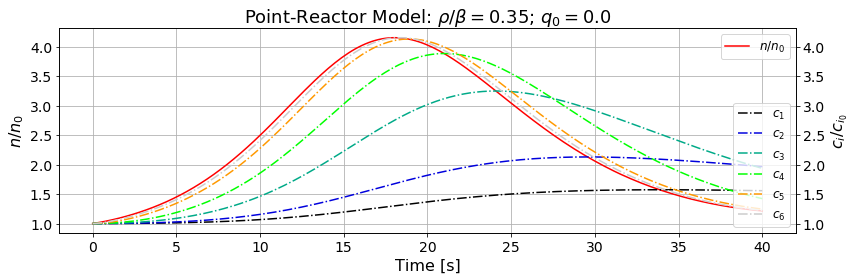

In [52]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [53]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n     c_1      c_2     c_3     c_4    c_5    c_6
0  0.000  0.493  85.327  230.218  56.615  42.075  3.234  0.447
1  0.201  0.497  85.328  230.224  56.620  42.085  3.237  0.448
2  0.402  0.502  85.331  230.243  56.636  42.118  3.245  0.451
3  0.603  0.508  85.336  230.276  56.665  42.174  3.259  0.454
4  0.804  0.513  85.343  230.325  56.708  42.254  3.277  0.458

     time      n      c_1      c_2      c_3     c_4    c_5    c_6
0  39.196  0.559  133.074  456.455  113.276  62.102  4.123  0.559
1  39.397  0.556  133.005  455.400  112.317  61.504  4.096  0.556
2  39.598  0.553  132.934  454.344  111.372  60.925  4.070  0.553
3  39.799  0.550  132.863  453.286  110.440  60.366  4.046  0.550
4  40.000  0.547  132.790  452.226  109.522  59.825  4.023  0.547



### Reactivity Oscillations about Zero (Divergent Power)<a id="rhoosc1"></a>

Assuming a critical, steady-state reactor, without source, $q_\text{ss}=0$ , then $n_\text{ss}$ is arbitrary. 
Introducing many cycles of sinusoidal variation of reactivity ($\rho/\beta < 1$), observe:
  - Diverging power for multiple cycles for the oscillation of reactivity about zero.

In [54]:
'''Evolve the point-reactor for 4 cycles'''

time_final    = 3/params['reactivity_cycle_freq'] # s
n_time_stamps = 200 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

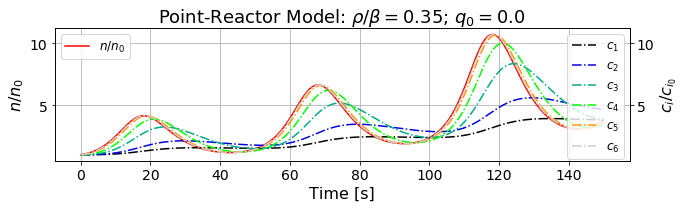

In [61]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

Using a reactivity bias to control divergence.

In [25]:
'''Setup up initial conditions'''

import numpy as np

params['q_0'] = 0.0 # must set the initial value of the source here

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_0_over_beta = 0.35 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta $"

params['reactivity_cycle_freq'] = 1/100 # 100-s period

params['reactivity_bias'] = -.84*rho_0_over_beta**2 * beta

# setup remaining initial conditions
setup_initial_conditions(params)

In [30]:
'''Evolve the point-reactor for 4 cycles'''

time_final    = 4/params['reactivity_cycle_freq'] # s
n_time_stamps = 200 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

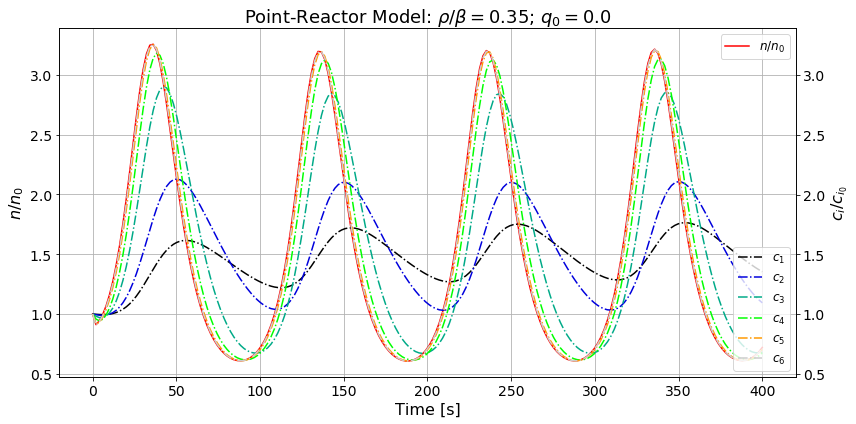

In [31]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

## Ramp-Input Response for Reactor Startup<a id="ramp"></a>

Assuming a critical, $\rho/\beta = 0$, steady-state reactor, without source, $q_\text{ss}=0$ , then $n_\text{ss}$ is arbitrary. 
Consider a reactivity ramp rate of $\gamma/\beta = 0.1$ s$^{-1}$.

In [32]:
'''Reactivity function'''

def rho_func( t, params ):
    '''
    Reactivity function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `value_below_0` key/value pair.
    
    Returns
    -------
    rho_t: float
        Value of reactivity.

    Examples
    --------
    '''
    
    rho_0 = params['rho_0']
    gamma = params['reactivity_ramp_rate']
    
    rho_t = rho_0 + gamma * t
        
    return rho_t

In [33]:
'''Setup up initial conditions'''

import numpy as np

params['q_0'] = 0.0 # must set the initial value of the source here

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_0_over_beta = 0 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta $"

gamma_over_beta = 0.1
params['reactivity_ramp_rate'] = gamma_over_beta * beta

# setup remaining initial conditions
setup_initial_conditions(params)

In [34]:
'''Evolve the point-reactor for one cycle'''

time_final    = 5 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

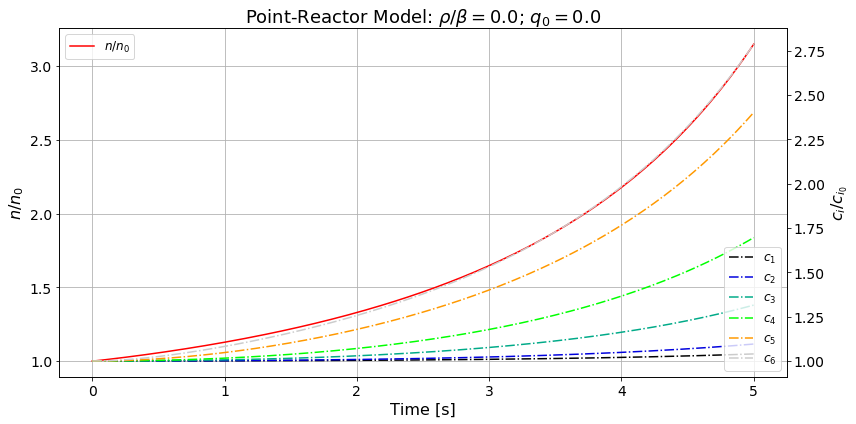

In [35]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [ ]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

In [36]:
print('rho/beta(final) = %3.3f'%(rho_func(time_final,params)/beta))

rho/beta(final) = 0.500


### Startup Accident for a Shut-Down Reactor<a id="ramp1"></a>

Assuming a sub-critical, steady-state reactor, $\rho_\text{ss}/\beta = -2$, then some corresponding source $q_\text{ss}$, produces $n_\text{ss}=-\frac{q_\text{ss}\,\ell}{\rho_\text{ss}}$.
Consider a reactivity ramp rate of $\rho/\beta = 1$ 1/s and turn off the source (delta function) at the start-up time.

In [37]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source constant function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `'q_0'` key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    
    q_0 = params['q_0']
        
    return q_0

In [38]:
'''Setup up initial conditions'''

import numpy as np

rho_ss_over_beta = -2 # $

beta = params['beta'] # retrieve the delayed neutron fraction
rho_ss = rho_ss_over_beta * beta # set the reactivity
params['reactivity'] = rho_ss

gamma_over_beta = 1
params['reactivity_ramp_rate'] = gamma_over_beta * beta

n_ss = np.random.random() # pick an arbitray value for the steady state
params['n_ss'] = n_ss

gen_time = params['gen_time'] # retrieve neutron generation time
q_ss = - n_ss * rho_ss / gen_time

params['q_0'] = q_ss # turn off the source (see delta function)

# setup remaining initial conditions
setup_initial_conditions(params)

In [39]:
'''Evolve the point-reactor for one cycle'''

time_final    = 3 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

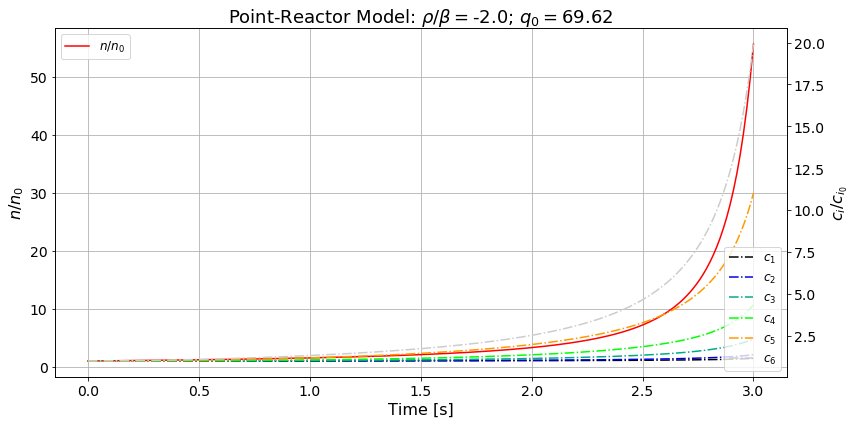

In [40]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [ ]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

In [41]:
print('rho/beta(start) = %3.3f'%(rho_func(0,params)/beta))
print('rho/beta(2s)    = %3.3f'%(rho_func(2,params)/beta))
print('rho/beta(final) = %3.3f'%(rho_func(time_final,params)/beta))

rho/beta(start) = -2.000
rho/beta(2s)    = 0.000
rho/beta(final) = 1.000


## Interactive Results <a id="ires"></a>
Here we can change the parameters interactively and compute the dynamics automatically.

In [ ]:
'''Create interactive plot'''
#from plotly import __version__
#print( __version__) # requires version >= 3.4.0

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools


fig = go.FigureWidget()
fig = tools.make_subplots(rows=2, cols=1, print_grid=False)

layout = go.Layout(title='Point-Reactor Model', 
         xaxis={'title':'Time [s]'}, 
         yaxis=dict(side='left',title='$n/n_0$',anchor='x'),
         xaxis2={'title':'Time [s]'}, 
         yaxis2=dict(side='left',title='$c_i/c_{i_0}',anchor='x2'),
                )

fig.layout.titlefont.size = 22
fig.layout.titlefont.family = 'Rockwell'

In [ ]:
'''Vary number of modes'''

from ipywidgets import interact
import ipywidgets as widgets
@interact(time_final=widgets.FloatSlider(description=r'$t_{max}\,[\text{s}]$',value=50,min=1,max=500,step=10,readout_format='3.0f'),
          rho_over_beta=widgets.FloatSlider(description=r'$\rho/\beta=$',value=0.01,min=-0.1,max=0.6,step=0.01,readout_format='5.3f'), 
          gen_time=widgets.FloatSlider(description=r'$\ell\,[\text{s}]=$',value=1e-4,min=1e-8,max=1e-3,step=1e-5,readout_format='5.3e'),
          select=widgets.Dropdown(description='select:',value='Neutron Dens.',options=['Neutron Dens.', 'Delayed-Neutron Precur.','All']) 
         )
def update(time_final, rho_over_beta, gen_time, select):
    with fig.batch_update():
       
        n_time_stamps = params['n_time_stamps']
        params['time_final'] = time_final
        
        time_stamps = np.linspace(0.0, time_final, num=n_time_stamps)
        params['time_stamps'] = time_stamps
        
        beta = params['beta']
        params['reactivity'] = rho_over_beta * beta
        
        params['gen_time']   = gen_time
        
        setup_initial_conditions(params)
        
        history = run_point_reactor( f_vec, params )
        
        def plotly_neutron(fig,row=1):
            scatt = fig.add_scatter(name='$n/n_0$',mode='lines')
            scatt.x = time_stamps
            scatt.y = history[:,0]/params['n_0']
            scatt.xaxis='x'
            scatt.yaxis='y'
            scatt.line.color='red'
            fig.append_trace(scatt, row, 1) 
            fig['layout']['xaxis'].update(title='Time [s]', showgrid=True)
            fig['layout']['yaxis'].update(title='$n/n_0$', showgrid=True)
            fig['layout'].update(title='Point-Reactor Model Neutron Density')  
            return
        
        def plotly_precursors(fig,row=1):
            
            if row == 1:
                xaxis = 'xaxis'
                yaxis = 'yaxis'
            elif row == 2:
                xaxis = 'xaxis2'
                yaxis = 'yaxis2'
            else:
                assert False
            
            import matplotlib.pyplot as plt
            color_ids = np.linspace(0,1,u_vec_history[:,1:].shape[1])
            
            for (j,color_id) in zip( range(u_vec_history[:,1:].shape[1]), color_ids ):
                color = plt.cm.nipy_spectral(color_id)
                red_channel   = str(int(color[0]*255))
                green_channel = str(int(color[1]*255))
                blue_channel  = str(int(color[2]*255))
                color ='rgb('+red_channel+','+green_channel+','+blue_channel+')'
                label ='$c_%i/c_{%i_0}$'%(j+1,j+1)
                scatt = fig.add_scatter(name=label,mode='lines')
                scatt.line.color = color
                scatt.x = time_stamps
                scatt.y = u_vec_history[:,j+1]/params['c_vec_0'][j]
                
                if row==1:
                    scatt.xaxis='x'
                    scatt.yaxis='y'
                elif row==2:
                    scatt.xaxis='x2'
                    scatt.yaxis='y2'
                else:
                    assert False, 'not available.'
                    
                fig.append_trace(scatt, row, 1)
                fig['layout'].update(title='Delayed-Neutron Precursors')
                fig['layout'][xaxis].update(title='Time [s]', showgrid=True)
                fig['layout'][yaxis].update(title=r'$c_i/c_{i_0}$', showgrid=True)
                fig['layout'].update(title='Point-Reactor Model Delayed-Neutron Precursors')
            return
               
        if select == 'Neutron Dens.':
            fig.data = [] # clear the data stack          
            plotly_neutron(fig,row=1)
            
        elif select == 'Delayed-Neutron Precur.':
            fig.data = [] # clear the data stack
            plotly_precursors(fig,row=1)

        elif select == 'All':
            fig.data = [] # clear the data stack
            plotly_neutron(fig,row=1)
            plotly_precursors(fig,row=2)
  
        else:
            assert False, 'no other option; bail out'
            
    fig['layout'].update(height=900, width=950) 
    
    plotly.offline.iplot(fig)
    
    return

#plotly.offline.plot(fig, include_plotlyjs=False, output_type='div')